<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB04_2403a52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import pandas for loading and handling CSV datasets
import pandas as pd

# Import numpy for numerical operations (used internally by ML libraries)
import numpy as np

# Import regular expressions module for text cleaning
import re

# Import NLTK for natural language processing tasks
import nltk

# Import matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import TF-IDF vectorizer to convert text into numerical feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Import stopwords list (common words like 'is', 'the', 'and')
from nltk.corpus import stopwords

# Import tokenizer to split sentences into individual words
from nltk.tokenize import word_tokenize

# Import WordCloud to create visual word frequency representation
from wordcloud import WordCloud


In [2]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
df = pd.read_csv("tweets.csv")


In [24]:
df.head()


,tweet_id,text,airline_sentiment
0,1,flight delayed for hours very bad service,negative
1,2,worst airline ever customer service is terrible,negative
2,3,my flight got cancelled without any notice,negative
3,4,rude staff and long waiting time at airport,negative
4,5,missed my connection because of flight delay,negative


In [25]:
stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"@\w+", "", text)           # remove mentions
    text = re.sub(r"#\w+", "", text)           # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)    # remove punctuation
    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)


In [28]:
# Import NLTK library for natural language processing
import nltk

# Download tokenizer resources required for word_tokenize
# 'punkt' is the correct package used for sentence and word tokenization
nltk.download('punkt')

# Apply the clean_tweet() function to each tweet in the 'text' column
# This creates a new column 'cleaned_text' with preprocessed tweets
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Display original tweet text alongside cleaned tweet text
# head() shows the first 5 rows for verification
df[['text', 'cleaned_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,cleaned_text
0,flight delayed for hours very bad service,flight delayed hours bad service
1,worst airline ever customer service is terrible,worst airline ever customer service terrible
2,my flight got cancelled without any notice,flight got cancelled without notice
3,rude staff and long waiting time at airport,rude staff long waiting time airport
4,missed my connection because of flight delay,missed connection flight delay


In [29]:
negative_tweets = df[df['airline_sentiment'] == 'negative']
negative_tweets.shape


(10, 4)

In [30]:
# Extract the 'cleaned_text' column from negative tweets
# and convert it into a Python list
corpus = negative_tweets['cleaned_text'].tolist()


In [31]:
# Create a TF-IDF Vectorizer object
# max_features=1000 limits the vocabulary to the top 1000 important words
vectorizer = TfidfVectorizer(max_features=1000)

# Learn the vocabulary from the corpus and transform text into TF-IDF vectors
# fit()  -> learns word importance (IDF)
# transform() -> converts text into numerical TF-IDF values
tfidf_matrix = vectorizer.fit_transform(corpus)


In [32]:
# Convert the TF-IDF sparse matrix into a dense NumPy array
# and then into a pandas DataFrame for easy analysis
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),                 # Convert sparse matrix to dense array
    columns=vectorizer.get_feature_names_out()  # Set column names as words (features)
)


In [13]:
tfidf_df.head()


,airline,airport,bad,baggage,book,cancelled,complaint,connection,customer,delay,...,service,staff,support,terrible,time,uncomfortable,unhelpful,waiting,without,worst
0,0.000000,0.000000,0.490297,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.416798,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.342289,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.391241,0.000000,...,0.391241,0.000000,0.0,0.460234,0.000000,0.0,0.0,0.000000,0.000000,0.391241
2,0.000000,0.000000,0.000000,0.0,0.0,0.474727,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.474727,0.000000
3,0.000000,0.408248,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.408248,0.0,0.000000,0.408248,0.0,0.0,0.408248,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.539382,0.000000,0.539382,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [33]:
# Calculate the average TF-IDF score for each word across all tweets
# and sort the words in descending order of importance
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Select the top 15 words with the highest average TF-IDF scores
top_terms = mean_tfidf.head(15)


In [15]:
top_terms


,0
flight,0.135141
airline,0.115629
worst,0.083184
service,0.080804
customer,0.078242
complaint,0.062584
response,0.062584
seats,0.053938
missed,0.053938
uncomfortable,0.053938


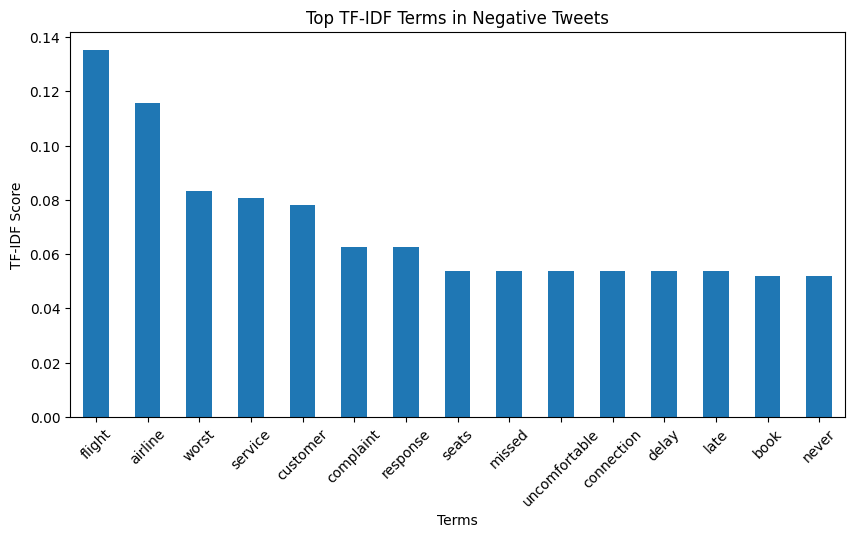

In [34]:
# Create a new figure with specified width and height
plt.figure(figsize=(10,5))

# Plot a bar chart using the top TF-IDF terms
# x-axis -> words (terms)
# y-axis -> average TF-IDF scores
top_terms.plot(kind='bar')

# Set the title of the bar chart
plt.title("Top TF-IDF Terms in Negative Tweets")

# Label the x-axis
plt.xlabel("Terms")

# Label the y-axis
plt.ylabel("TF-IDF Score")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot on the screen
plt.show()


In [35]:
# Create a WordCloud object with specified dimensions and background color
wordcloud = WordCloud(
    width=800,              # Width of the word cloud image in pixels
    height=400,             # Height of the word cloud image in pixels
    background_color='white'  # Background color of the word cloud
).generate_from_frequencies(top_terms)  # Generate word cloud using TF-IDF scores


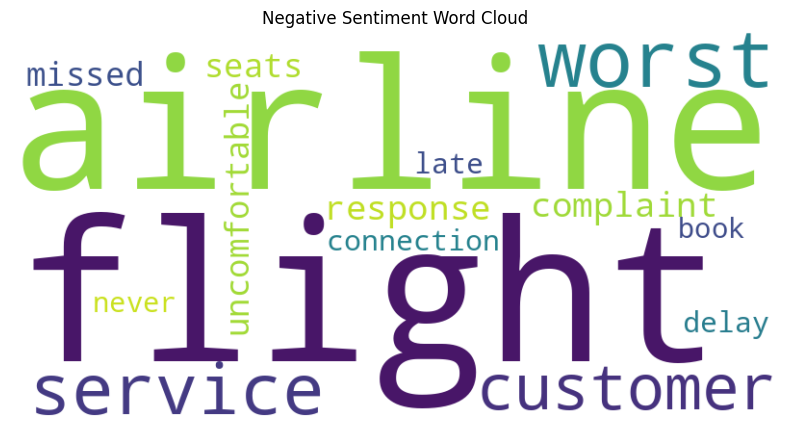

In [39]:
# Create a new figure window with specified size
plt.figure(figsize=(10,5))

# Display the generated word cloud image
# interpolation='bilinear' makes the image smoother
plt.imshow(wordcloud, interpolation='bilinear')

# Turn off x-axis and y-axis for a clean visualization
plt.axis('off')

# Add a title to the word cloud
plt.title("Negative Sentiment Word Cloud")

# Render the word cloud on the screen
plt.show()
